In [426]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [427]:
pip install scipy


In [428]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [429]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [430]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [432]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [433]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [434]:
# len(results.left_hand_landmarks.landmark)

In [435]:
# results

In [436]:
draw_landmarks(frame, results)

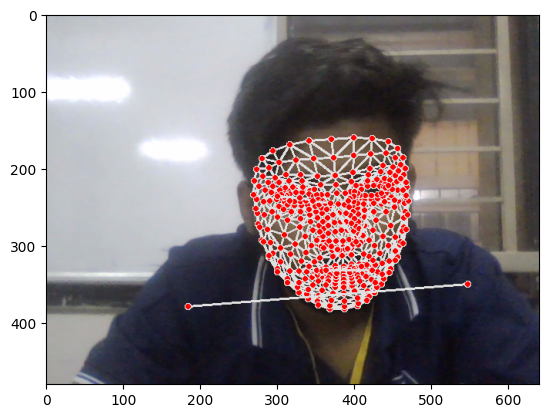

In [437]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [438]:
#extreact key points

In [439]:
results.pose_landmarks.landmark

[x: 0.628469527
y: 0.615329444
z: -2.99202394
visibility: 0.997950792
, x: 0.664813161
y: 0.510816276
z: -2.97511363
visibility: 0.995474577
, x: 0.687417626
y: 0.506913722
z: -2.97477698
visibility: 0.99567759
, x: 0.707763135
y: 0.502951264
z: -2.97543931
visibility: 0.994459033
, x: 0.57723546
y: 0.51215446
z: -2.9933064
visibility: 0.996559143
, x: 0.541502535
y: 0.505334437
z: -2.9934
visibility: 0.997287691
, x: 0.514431775
y: 0.496636927
z: -2.99354982
visibility: 0.997288823
, x: 0.730680466
y: 0.491291881
z: -2.3935647
visibility: 0.995224
, x: 0.469160795
y: 0.491907209
z: -2.445189
visibility: 0.998569846
, x: 0.661061168
y: 0.692622423
z: -2.73075151
visibility: 0.998274326
, x: 0.56836617
y: 0.692706287
z: -2.74683619
visibility: 0.999164164
, x: 0.856209457
y: 0.729513
z: -1.70751345
visibility: 0.995609
, x: 0.28827244
y: 0.791070163
z: -1.72476602
visibility: 0.998564899
, x: 1.00431538
y: 1.00291407
z: -1.42775428
visibility: 0.374052614
, x: 0.157741278
y: 1.09064651


In [440]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [441]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [442]:
face = np.zeros(1404)  # Default value in case no face landmarks are detected
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()


In [443]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [444]:
result_test = extract_keypoints(results)

In [445]:

result_test

array([ 0.62846953,  0.61532944, -2.99202394, ...,  0.        ,
        0.        ,  0.        ])

In [446]:
np.save('0', result_test)

In [447]:
np.load('0.npy')

array([ 0.62846953,  0.61532944, -2.99202394, ...,  0.        ,
        0.        ,  0.        ])

In [448]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['iam', 'good', 'boy'])

# Number of sequences per action
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start index
start_folder = 1

In [449]:
# os.makedirs(DATA_PATH, exist_ok=True)

# for action in actions:
#     action_path = os.path.join(DATA_PATH, action)

#     # Ensure the action directory exists before listing contents
#     os.makedirs(action_path, exist_ok=True)

#     # Get existing sequence folders and find the max index safely
#     existing_folders = []
#     if os.path.exists(action_path):  # Check if the directory exists
#         existing_folders = [int(folder) for folder in os.listdir(action_path) if folder.isdigit()]
    
#     dirmax = max(existing_folders) if existing_folders else 0  # Set to 0 if empty

#     # Create new sequence folders
#     for sequence in range(1, no_sequences + 1):
#         new_folder = os.path.join(action_path, str(dirmax + sequence))
#         os.makedirs(new_folder, exist_ok=True)  # Use exist_ok=True to avoid errors

In [308]:
# # Initialize Video Capture
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     for action in actions:
#         for sequence in range(start_folder, start_folder + no_sequences):
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Check if frame is captured
#                 if not ret:
#                     print("⚠️ Warning: Unable to read frame. Skipping...")
#                     continue

#                 # Make detections
#                 image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
#                 results = holistic.process(image)

#                 # Convert back to BGR for OpenCV display
#                 image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#                 # Draw landmarks
#                 if results.face_landmarks:
#                     mp.solutions.drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
#                 if results.pose_landmarks:
#                     mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#                 if results.left_hand_landmarks:
#                     mp.solutions.drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#                 if results.right_hand_landmarks:
#                     mp.solutions.drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

#                 # NEW Apply wait logic
#                 if frame_num == 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120, 200),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(5000)
#                 else:
#                     cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     cv2.imshow('OpenCV Feed', image)

#                 # NEW Ensure directory exists before saving
#                 npy_folder = os.path.join(DATA_PATH, action, str(sequence))
#                 os.makedirs(npy_folder, exist_ok=True)  # ✅ Create missing directory
                
#                 # Extract keypoints function
#                 def extract_keypoints(results):
#                     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#                     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#                     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
#                     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
#                     return np.concatenate([pose, face, lh, rh])

#                 # Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(npy_folder, f"{frame_num}.npy")
#                 np.save(npy_path, keypoints)  # ✅ Save keypoints

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break

# # Release webcam and close OpenCV windows
# cap.release()
# cv2.destroyAllWindows()

In [450]:
cap.release()
cv2.destroyAllWindows()

In [451]:
#pREPROCESS DATA AND CREATE LABELS AND FEATURES

In [452]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [453]:
label_map = {label:num for num, label in enumerate(actions)}

In [454]:
label_map

{'iam': 0, 'good': 1, 'boy': 2}

In [455]:
sequences, labels = [], []

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):  # ✅ FIXED: Removed +1 to avoid extra frame
            npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
            
            # ✅ FIX: Check if file exists before loading
            if os.path.exists(npy_path):
                res = np.load(npy_path)
                window.append(res)
            else:
                print(f"⚠️ Warning: Missing file {npy_path}, using zeros as placeholder.")
                window.append(np.zeros(1662))  # Adjust based on your keypoint size

        sequences.append(window)
        labels.append(label_map[action])  # Ensure label_map exists


⚠️ Warning: Missing file MP_Data\iam\30\0.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\1.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\2.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\3.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\4.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\5.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\6.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\7.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\8.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\9.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\10.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\11.npy, using zeros as placeholder.
⚠️ Warning: Missing file MP_Data\iam\30\12.npy, using zeros as placeholder.
⚠️ Warning: Missing fi

In [456]:
np.array(sequences).shape

(179, 30, 1662)

In [457]:
np.array(labels).shape

(179,)

In [458]:
X = np.array(sequences)

In [459]:
X.shape

(179, 30, 1662)

In [460]:
y = to_categorical(labels).astype(int)

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [462]:
y_test.shape

(9, 3)

In [463]:
#Build and train neural network

In [464]:
from tensorflow.keras.models import Sequential #sequential flow of neural network creation
from tensorflow.keras.layers import LSTM, Dense #a component to build the neural network
from tensorflow.keras.callbacks import TensorBoard #

In [465]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [466]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Define the model
# model = Sequential([
#     Input(shape=(30, 1662)),  # Define input shape here
#     LSTM(64, return_sequences=True, activation='relu'),
#     LSTM(128, return_sequences=True, activation='relu'),
#     LSTM(64, return_sequences=False, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(actions.shape[0], activation='softmax')  # Ensure actions is defined
# ])



In [467]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [468]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - categorical_accuracy: 0.3464 - loss: 5.4905
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.3886 - loss: 4.8675 
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3363 - loss: 13.7622 
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3391 - loss: 5.9945 
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3592 - loss: 9.8321  
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3396 - loss: 29.0611 
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3666 - loss: 42.0144 
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3319 - loss: 144.6485 
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3207 - loss: 143.8982 
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3046 - loss: 32.1678 
Epoch 11/20

In [469]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [470]:
#MAke predictions

In [471]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


In [472]:
if len(res) > 4:
    predicted_action = actions[np.argmax(res[4])]
else:
    predicted_action = actions[np.argmax(res[0])]  

if len(y_test) > 4:
    actual_action = actions[np.argmax(y_test[4])]
else:
    actual_action = actions[np.argmax(y_test[0])]

print("Predicted Action:", predicted_action)
print("Actual Action:", actual_action)


Predicted Action: iam
Actual Action: good


In [473]:
model.save('action.h5')

In [474]:
# del model

In [475]:
model.load_weights('action.h5')

In [476]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [477]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [478]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [479]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 5],
        [1, 1]],

       [[4, 1],
        [3, 1]],

       [[6, 0],
        [2, 1]]], dtype=int64)

In [480]:
accuracy_score(ytrue, yhat)

0.3333333333333333

In [481]:
from scipy import stats

In [482]:
# colors = [(245,117,16), (117,245,16), (16,117,245)]# Generate one color per action

# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()

#     # Debugging prints
#     print(f"res length: {len(res)}, actions length: {len(actions)}, colors length: {len(colors)}")

#     for num, prob in enumerate(res):
#         if num >= len(actions) or num >= len(colors):  # Prevent index error
#             print(f"Skipping index {num}, out of range")
#             continue
            
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#     return output_frame

import cv2
import numpy as np
import matplotlib.pyplot as plt

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Generate one color per action

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Debugging prints
    print(f"res length: {len(res)}, actions length: {len(actions)}, colors length: {len(colors)}")
    print(f"res values: {res}")

    for num, prob in enumerate(res):
        if num >= len(actions) or num >= len(colors):  # Prevent index error
            print(f"Skipping index {num}, out of range")
            continue

        # Ensure prob is a scalar by taking the first value if it's an array
        if isinstance(prob, (np.ndarray, list)):
            prob = float(prob[0])  # Convert to a single float value
        
        # Draw probability visualization
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

res length: 9, actions length: 3, colors length: 3
res values: [[1.6603740e-02 9.8339498e-01 1.2701693e-06]
 [3.4476119e-01 3.2908446e-01 3.2615432e-01]
 [1.8966109e-02 1.2730872e-08 9.8103392e-01]
 [7.4194407e-01 2.5561017e-01 2.4457921e-03]
 [3.4476119e-01 3.2908446e-01 3.2615432e-01]
 [2.6549602e-02 9.7344798e-01 2.4081328e-06]
 [3.4476119e-01 3.2908446e-01 3.2615432e-01]
 [7.2026825e-01 2.7679345e-01 2.9382990e-03]
 [3.4476119e-01 3.2908446e-01 3.2615432e-01]]
Skipping index 3, out of range
Skipping index 4, out of range
Skipping index 5, out of range
Skipping index 6, out of range
Skipping index 7, out of range
Skipping index 8, out of range


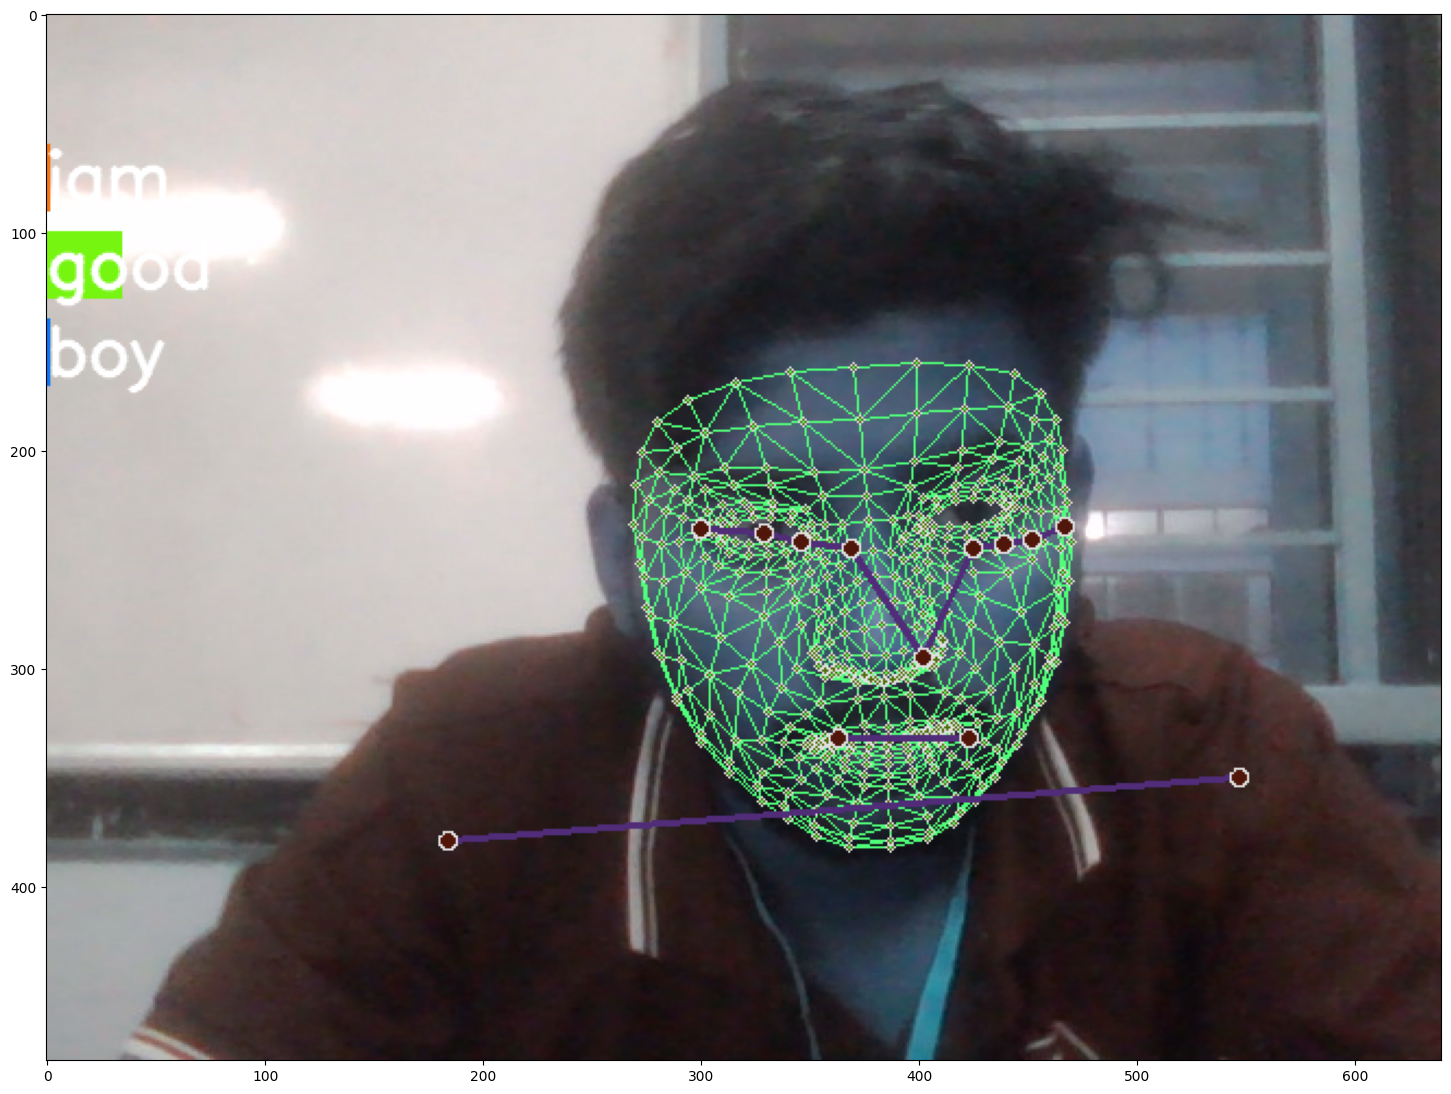

In [483]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [485]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.85

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # 3. Viz logic
            if len(predictions) >= 10 and np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti